In [1]:
import os
import pandas as pd

from sklearn.metrics import r2_score

import joblib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import biomassml

from biomassml.build_model import *
from biomassml.coregionalized_regressor import *
from biomassml.feature_importance import *
from biomassml.metrics import *
from biomassml.plotting import *
from biomassml.predict import *
from biomassml.utils import *
from biomassml.predict_outputs import *

In [3]:
DATA_DIR = '/mnt/c/Users/44907688G/Documents/home_vicky/'

def load_data_file(data_dir=DATA_DIR, csv_file=''):
    DATA_FILE = os.path.join(data_dir, csv_file)
    return pd.read_csv(DATA_FILE)

In [4]:
output_names = ['CO (vol%)', r'H$_2$ (vol%)', 'COMBgas (vol%)', 'Eyield (MJ/kg biom)', r'CH$_4$ (vol%)',
                'SYNGAS (vol%)', r'H$_2$/CO', r'HHVgas (MJ/m$^3$)', r'GASyield (m$^3$/kg biom)', 'CGE (%)']

In [5]:
def create_pdf_test(prediction_collection_test, outputs, 
                    file_true='test_true_X.csv', file_predicted='test_predicted_X.csv', file_std='test_std_X.csv'):
    df_test_true = pd.DataFrame(np.concatenate([pred[0]['true'] for pred in prediction_collection_test]))
    for n in range(len(outputs)-1):
        df_test_true[n+1] = pd.DataFrame(np.concatenate([pred[n+1]['true'] for pred in prediction_collection_test]))
    df_test_true.columns = outputs
    df_test_predicted = pd.DataFrame(np.concatenate([pred[0]['mu'] for pred in prediction_collection_test]))
    for n in range(len(outputs)-1):
        df_test_predicted[n+1] = pd.DataFrame(np.concatenate([pred[n+1]['mu'] for pred in prediction_collection_test]))
    df_test_predicted.columns = outputs
    df_test_std = pd.DataFrame(np.concatenate([pred[0]['std'] for pred in prediction_collection_test]))
    for n in range(len(outputs)-1):
        df_test_std[n+1] = pd.DataFrame(np.concatenate([pred[n+1]['std'] for pred in prediction_collection_test]))
    df_test_std.columns = outputs
    
    df_test_true.to_csv(file_true, index=False)
    df_test_predicted.to_csv(file_predicted, index=False)
    df_test_std.to_csv(file_std, index=False)

In [6]:
def parity_plots_train_test(prediction_collection_train, prediction_collection_test, n_output=0):
    fig, ax = plt.subplots(1, 2, figsize=(5, 4.5))
    
    y_true = np.concatenate([pred[n_output]["true"] for pred in prediction_collection_train])
    y_pred_mu = np.concatenate([pred[n_output]["mu"] for pred in prediction_collection_train])
    y_pred_std = np.concatenate([pred[n_output]["std"] for pred in prediction_collection_train])
    make_parity_plot(y_true, y_pred_mu.flatten(), ax[0], y_pred_std.flatten(), ls='none')
    ax[0].set_title(output_names[n_output]+'_train', fontsize=14)
    
    y_true = np.concatenate([pred[n_output]["true"] for pred in prediction_collection_test])
    y_pred_mu = np.concatenate([pred[n_output]["mu"] for pred in prediction_collection_test])
    y_pred_std = np.concatenate([pred[n_output]["std"] for pred in prediction_collection_test])
    make_parity_plot(y_true, y_pred_mu.flatten(), ax[1], y_pred_std.flatten(), ls='none')
    ax[1].set_title(output_names[n_output]+'_test', fontsize=14)
    
    fig.tight_layout()

In [7]:
def parity_plots_test(prediction_collection_test, outputs, n1=0, n2=1, n3=2, n4=3):
    fig, ax = plt.subplots(1, 4, figsize=(10, 5))
    
    y_true = np.concatenate([pred[n1]["true"] for pred in prediction_collection_test])
    y_pred_mu = np.concatenate([pred[n1]["mu"] for pred in prediction_collection_test])
    y_pred_std = np.concatenate([pred[n1]["std"] for pred in prediction_collection_test])
    make_parity_plot(y_true, y_pred_mu.flatten(), ax[0], y_pred_std.flatten(), ls='none', linewidth=1, color='#337eb8')
    ax[0].set_title(output_names[n1], fontsize=14)
    ax[0].set_xlabel('true', fontsize=11.5)
    ax[0].set_ylabel('predicted', fontsize=11.5)
    ax[0].tick_params(axis='both', bottom=False, left=False)
    R2 = test_metrics[n1]['r2']
    ax[0].annotate((f'R2: {R2:.4f}'), xy=(1, 0), xycoords='axes fraction', fontsize = 14,
                   xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')
    
    y_true = np.concatenate([pred[n2]["true"] for pred in prediction_collection_test])
    y_pred_mu = np.concatenate([pred[n2]["mu"] for pred in prediction_collection_test])
    y_pred_std = np.concatenate([pred[n2]["std"] for pred in prediction_collection_test])
    make_parity_plot(y_true, y_pred_mu.flatten(), ax[1], y_pred_std.flatten(), ls='none', linewidth=1, color='#337eb8')
    ax[1].set_title(output_names[n2], fontsize=14)
    ax[1].set_xlabel('true', fontsize=11.5)
    ax[1].set_ylabel(None)
    ax[1].tick_params(axis='both', bottom=False, left=False)
    R2 = test_metrics[n2]['r2']
    ax[1].annotate((f'R2: {R2:.4f}'), xy=(1, 0), xycoords='axes fraction', fontsize = 14,
                   xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')
    
    y_true = np.concatenate([pred[n3]["true"] for pred in prediction_collection_test])
    y_pred_mu = np.concatenate([pred[n3]["mu"] for pred in prediction_collection_test])
    y_pred_std = np.concatenate([pred[n3]["std"] for pred in prediction_collection_test])
    make_parity_plot(y_true, y_pred_mu.flatten(), ax[2], y_pred_std.flatten(), ls='none', linewidth=1, color='#337eb8')
    ax[2].set_title(output_names[n3], fontsize=14)
    ax[2].set_xlabel('true', fontsize=11.5)
    ax[2].set_ylabel(None)
    ax[2].tick_params(axis='both', bottom=False, left=False)
    R2 = test_metrics[n3]['r2']
    ax[2].annotate((f'R2: {R2:.4f}'), xy=(1, 0), xycoords='axes fraction', fontsize = 14,
                   xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')
    
    y_true = np.concatenate([pred[n4]["true"] for pred in prediction_collection_test])
    y_pred_mu = np.concatenate([pred[n4]["mu"] for pred in prediction_collection_test])
    y_pred_std = np.concatenate([pred[n4]["std"] for pred in prediction_collection_test])
    make_parity_plot(y_true, y_pred_mu.flatten(), ax[3], y_pred_std.flatten(), ls='none', linewidth=1, color='#337eb8')
    ax[3].set_title(output_names[n4], fontsize=14)
    ax[3].set_xlabel('true', fontsize=11.5)
    ax[3].set_ylabel(None)
    ax[3].tick_params(axis='both', bottom=False, left=False)
    R2 = test_metrics[n4]['r2']
    ax[3].annotate((f'R2: {R2:.4f}'), xy=(1, 0), xycoords='axes fraction', fontsize = 14,
                   xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')

In [7]:
def get_scalers(X, y):
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    X_scaled = x_scaler.fit_transform(X)
    y_scaled = y_scaler.fit_transform(y)
    return x_scaler, y_scaler

In [8]:
def scale_X(X, x_scaler):
    X_scaled = x_scaler.transform(X)
    return X_scaled

### multioutput GPR model - LOOCV
### 12 features -  4 outputs (volCO, volH2, volCOMB, Edensity)

In [8]:
dfGASIF_dataset = load_data_file(DATA_DIR, 'data_GASIF_biomass.csv')

In [9]:
dfGASIF_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BIOMASS                30 non-null     object 
 1   BIOMASS_SR             30 non-null     object 
 2   SA                     30 non-null     float64
 3   SBR                    30 non-null     float64
 4   HHVbiom (MJ/kg)        30 non-null     float64
 5   T (K)                  30 non-null     int64  
 6   SR                     30 non-null     float64
 7   He_density (g/cm3)     30 non-null     float64
 8   C (%)                  30 non-null     float64
 9   N (%)                  30 non-null     float64
 10  H (%)                  30 non-null     float64
 11  S (%)                  30 non-null     float64
 12  O (%)                  30 non-null     float64
 13  ash (%)                30 non-null     float64
 14  VM (%)                 30 non-null     float64
 15  FC (%)  

In [10]:
FEATURES_GASIF_12 = pd.concat([dfGASIF_dataset.iloc[:,2:7], dfGASIF_dataset.iloc[:,[8,10,12,13,14,15,16]]], axis=1)
FEATURES_GASIF_12.head(1)

,SA,SBR,HHVbiom (MJ/kg),T (K),SR,C (%),H (%),O (%),ash (%),VM (%),FC (%),MC (%)
0,2.33,1.1,19.5649,1173,0.13,49.44,5.85,42.9,1.45,78.93,19.62,6.52


In [11]:
TARGETS_GASIF_4 = dfGASIF_dataset.iloc[:,[24,26,27,38]]
TARGETS_GASIF_4.head(1)

,volCO (%),volH2 (%),volCOMB (%),Edensity (MJ/kg biom)
0,23.6541,36.4296,67.4756,7.8526


In [12]:
features = list(FEATURES_GASIF_12.columns)
outputs = list(TARGETS_GASIF_4.columns)
X = FEATURES_GASIF_12
y = TARGETS_GASIF_4

In [13]:
kernel_1 = get_rbf_kernel(len(features), ARD=True)
kernel_2 = get_matern_32_kernel(len(features), ARD=True)
kernel_3 = get_matern_52_kernel(len(features), ARD=True)
kernel_4 = get_ratquad_kernel(len(features), ARD=True)
kernel_5 = get_linear_kernel(len(features), ARD=True)
kernel_6 = get_rbf_kernel(len(features), ARD=True) + get_linear_kernel(len(features), ARD=True)
kernel_6exp = get_rbf_kernel(len(features), ARD=True) + get_linear_kernel(
    len(features), ARD=True) + get_exponential_kernel(len(features), ARD=True)
kernel_7 = get_matern_32_kernel(len(features), ARD=True) + get_linear_kernel(len(features), ARD=True)
kernel_8 = get_matern_52_kernel(len(features), ARD=True) + get_linear_kernel(len(features), ARD=True)
kernel_9 = get_ratquad_kernel(len(features), ARD=True) + get_linear_kernel(len(features), ARD=True)
kernel_10 = get_rbf_kernel(len(features), ARD=True) * get_linear_kernel(len(features), ARD=True)
kernel_11 = get_matern_32_kernel(len(features), ARD=True) * get_linear_kernel(len(features), ARD=True)
kernel_12 = get_matern_52_kernel(len(features), ARD=True) * get_linear_kernel(len(features), ARD=True)
kernel_13 = get_ratquad_kernel(len(features), ARD=True) * get_linear_kernel(len(features), ARD=True)

In [14]:
kernel_14 = get_exponential_kernel(len(features), ARD=True)
kernel_15 = get_expquad_kernel(len(features), ARD=True)
kernel_16 = get_exponential_kernel(len(features), ARD=True) + get_linear_kernel(len(features), ARD=True)
kernel_17 = get_expquad_kernel(len(features), ARD=True) + get_linear_kernel(len(features), ARD=True)
kernel_18 = get_exponential_kernel(len(features), ARD=True) * get_linear_kernel(len(features), ARD=True)
kernel_19 = get_expquad_kernel(len(features), ARD=True) * get_linear_kernel(len(features), ARD=True)
kernel_20 = get_exponential_kernel(len(features), ARD=True) + get_rbf_kernel(len(features), ARD=True)
kernel_21 = get_expquad_kernel(len(features), ARD=True) + get_rbf_kernel(len(features), ARD=True)
kernel_22 = get_exponential_kernel(len(features), ARD=True) * get_rbf_kernel(len(features), ARD=True)
kernel_23 = get_expquad_kernel(len(features), ARD=True) * get_rbf_kernel(len(features), ARD=True)

### training model

#### kernel_6 = get_rbf_kernel(len(features), ARD=True) + get_linear_kernel(len(features), ARD=True)

In [18]:
model_12in4outEdens_kernel6 = build_coregionalized_model(X.values, y.values, kernel=kernel_6)

test_metrics, prediction_collection_train, prediction_collection_test = loocv_train_test(
    model_12in4outEdens_kernel6, X.values, y.values, coregionalized=True, n_restarts=20)

2022-05-04 15:20:01.687 | INFO     | biomassml.metrics:loocv_train_test:86 - LOOCV iteration 0
overflow encountered in square
invalid value encountered in add
invalid value encountered in multiply
overflow encountered in true_divide
2022-05-04 15:20:32.860 | INFO     | biomassml.metrics:loocv_train_test:86 - LOOCV iteration 1
overflow encountered in expm1
2022-05-04 15:21:04.131 | INFO     | biomassml.metrics:loocv_train_test:86 - LOOCV iteration 2
2022-05-04 15:21:43.348 | INFO     | biomassml.metrics:loocv_train_test:86 - LOOCV iteration 3
2022-05-04 15:22:17.107 | INFO     | biomassml.metrics:loocv_train_test:86 - LOOCV iteration 4
2022-05-04 15:22:52.352 | INFO     | biomassml.metrics:loocv_train_test:86 - LOOCV iteration 5
2022-05-04 15:23:20.559 | INFO     | biomassml.metrics:loocv_train_test:86 - LOOCV iteration 6
2022-05-04 15:24:04.348 | INFO     | biomassml.metrics:loocv_train_test:86 - LOOCV iteration 7
2022-05-04 15:24:46.257 | INFO     | biomassml.metrics:loocv_train_test:

In [19]:
joblib.dump(model_12in4outEdens_kernel6, 'model_12in4outEdens_kernel6')
model_12in4outEdens_kernel6

gp.,value,constraints,priors
ICM.sum.rbf.variance,1.0,+ve fixed,
ICM.sum.rbf.lengthscale,"(12,)",+ve,
ICM.sum.linear.variances,"(12,)",+ve fixed,
ICM.B.W,"(4, 1)",,
ICM.B.kappa,"(4,)",+ve,
mixed_noise.Gaussian_noise_0.variance,2.7727121549157147e-16,+ve,
mixed_noise.Gaussian_noise_1.variance,1.7118264462526026e-21,+ve,
mixed_noise.Gaussian_noise_2.variance,0.0016748306639001352,+ve,
mixed_noise.Gaussian_noise_3.variance,0.04090325421308968,+ve,


In [20]:
create_pdf_test(prediction_collection_test, outputs,
                file_true='test_true_kernel6.csv', 
                file_predicted='test_predicted_kernel6.csv', 
                file_std='test_std_kernel6.csv')

In [21]:
test_metrics

{0: {'nll': 0.2659576779279688,
  'picp': 1.0,
  'mpiw': 0.16861023257526683,
  'mse': 0.04664134270290646,
  'rmse': 0.21596606840637364,
  'r2': 0.958907062868812,
  'mae': 0.17517943224548055,
  'max_error': 0.45841192262835806,
  'mape': 0.2506138688997368},
 1: {'nll': 2.079275121052249,
  'picp': 1.0,
  'mpiw': 0.23982338711001755,
  'mse': 0.11786723139701932,
  'rmse': 0.34331797418285476,
  'r2': 0.9016066654447678,
  'mae': 0.25015611974977053,
  'max_error': 0.703651676966691,
  'mape': 2.684379742044794},
 2: {'nll': 1.2661602199771886,
  'picp': 1.0,
  'mpiw': 0.23105402964035496,
  'mse': 0.08443143512207804,
  'rmse': 0.2905708779662512,
  'r2': 0.9245813299257378,
  'mae': 0.23569405258228057,
  'max_error': 0.6387127839137632,
  'mape': 0.5124271748913115},
 3: {'nll': 0.714140135099409,
  'picp': 1.0,
  'mpiw': 0.36500895903523917,
  'mse': 0.18712494646061134,
  'rmse': 0.4325794105833186,
  'r2': 0.8293683700625815,
  'mae': 0.37297440076983845,
  'max_error': 0.817

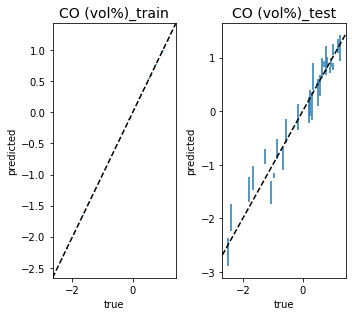

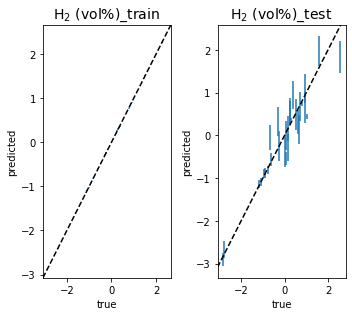

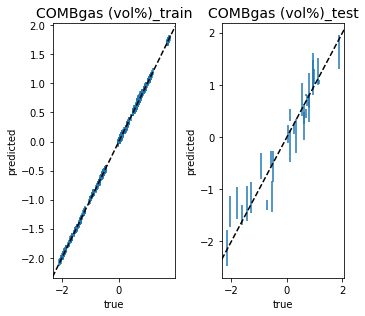

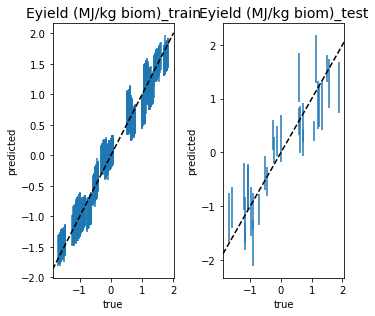

In [33]:
for n in range(y.shape[1]):
    parity_plots_train_test(prediction_collection_train, prediction_collection_test, n)

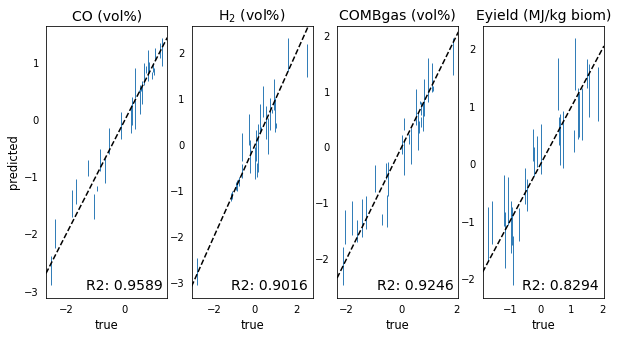

In [34]:
parity_plots_test(prediction_collection_test, outputs=outputs)

### predicted outputs

In [15]:
model = joblib.load('model_12in4outEden_k6')

#### get scalers from training GASIF dataset (12in_4out): x_scaler_12, y_scaler_4

In [16]:
x_scaler_12, y_scaler_4 = get_scalers(FEATURES_GASIF_12, TARGETS_GASIF_4)
print('x_scaler_12')
print(x_scaler_12.scale_)
print(x_scaler_12.mean_)
print(x_scaler_12.var_)
print('y_scaler_4')
print(y_scaler_4.scale_)
print(y_scaler_4.mean_)
print(y_scaler_4.var_)
joblib.dump(x_scaler_12, 'x_scaler_12')
joblib.dump(y_scaler_4, 'y_scaler_4')

x_scaler_12
[ 0.75911352  0.73204622  0.82142774 54.16025603  0.06        2.13491546
  0.34217864  2.47538783  3.27650993  4.05830583  1.72272136  1.77202333]
[1.96000000e+00 1.42500000e+00 2.02378467e+01 1.15300000e+03
 1.90000000e-01 5.11960000e+01 5.92066667e+00 3.96986667e+01
 2.41400000e+00 7.80226667e+01 1.95633333e+01 8.54000000e+00]
[5.76253333e-01 5.35891667e-01 6.74743538e-01 2.93333333e+03
 3.60000000e-03 4.55786400e+00 1.17086222e-01 6.12754489e+00
 1.07355173e+01 1.64698462e+01 2.96776889e+00 3.14006667e+00]
y_scaler_4
[7.27719234 4.17715748 6.46819745 3.47334698]
[30.37474333 32.23867333 72.05633    11.71019   ]
[52.95752832 17.44864465 41.83757831 12.06413925]


['y_scaler_4']

#### get y_scaler from OUTPUTS (11out): y_scaler_11

In [17]:
TARGETS_GASIF_11 = pd.concat([dfGASIF_dataset.iloc[:,23:30], dfGASIF_dataset.iloc[:,36:40]], axis=1)
TARGETS_GASIF_11.head(1)

,volCO2 (%),volCO (%),volCH4 (%),volH2 (%),volCOMB (%),volSYNG (%),H2_CO,HHV (MJ/m3),CGE (%),Edensity (MJ/kg biom),GAS (m3/kg biom)
0,32.5244,23.6541,7.3919,36.4296,67.4756,60.0837,1.5401,9.8471,40.1364,7.8526,0.7975


In [18]:
_, y_scaler_11 = get_scalers(FEATURES_GASIF_12, TARGETS_GASIF_11)
print('y_scaler_11')
print(y_scaler_11.scale_)
print(y_scaler_11.mean_)
print(y_scaler_11.var_)
joblib.dump(y_scaler_11, 'y_scaler_11')

y_scaler_11
[ 6.46819745  7.27719234  1.37250726  4.17715748  6.46819745  5.56016699
  0.53577682  1.03693841 15.78432973  3.47334698  0.25388598]
[27.94367    30.37474333  9.44290667 32.23867333 72.05633    62.61340667
  1.18146    10.89881667 57.47952    11.71019     1.06113333]
[4.18375783e+01 5.29575283e+01 1.88377619e+00 1.74486447e+01
 4.18375783e+01 3.09154570e+01 2.87056804e-01 1.07524128e+00
 2.49145065e+02 1.20641393e+01 6.44580909e-02]


['y_scaler_11']

#### scaling training GASIF dataset: X_scaled, y_scaled_4

In [19]:
X_scaled = scale_X(FEATURES_GASIF_12, x_scaler_12)
X_scaled = pd.DataFrame(X_scaled, columns=FEATURES_GASIF_12.columns)
X_scaled.head(1)

,SA,SBR,HHVbiom (MJ/kg),T (K),SR,C (%),H (%),O (%),ash (%),VM (%),FC (%),MC (%)
0,0.487411,-0.443961,-0.81924,0.369274,-1.0,-0.822515,-0.20652,1.293265,-0.294215,0.223574,0.032894,-1.13994


In [20]:
y_scaled_4 = scale_X(TARGETS_GASIF_4, y_scaler_4)
y_scaled_4 = pd.DataFrame(y_scaled_4, columns=TARGETS_GASIF_4.columns)
y_scaled_4.head(1)

,volCO (%),volH2 (%),volCOMB (%),Edensity (MJ/kg biom)
0,-0.923521,1.003296,-0.708193,-1.110626


#### scaling outputs: y_scaled_11

In [21]:
y_scaled_11 = scale_X(TARGETS_GASIF_11, y_scaler_11)
y_scaled_11 = pd.DataFrame(y_scaled_11, columns=TARGETS_GASIF_11.columns)
y_scaled_11.head(1)

,volCO2 (%),volCO (%),volCH4 (%),volH2 (%),volCOMB (%),volSYNG (%),H2_CO,HHV (MJ/m3),CGE (%),Edensity (MJ/kg biom),GAS (m3/kg biom)
0,0.708193,-0.923521,-1.49435,1.003296,-0.708193,-0.45497,0.669383,-1.014252,-1.098756,-1.110626,-1.038393


#### predicted outputs_unscaled

In [42]:
y_pred_mu_CO = predict_coregionalized(model, X_scaled.values, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
y_pred_std_CO = predict_coregionalized(model, X_scaled.values, 0)[1]*sqrt(y_scaler_11.var_[1])

y_pred_mu_H2 = predict_coregionalized(model, X_scaled.values, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
y_pred_std_H2 = predict_coregionalized(model, X_scaled.values, 1)[1]*sqrt(y_scaler_11.var_[3])

y_pred_mu_COMB = predict_coregionalized(model, X_scaled.values, 2)[0]*sqrt(y_scaler_11.var_[4]) + y_scaler_11.mean_[4]
y_pred_std_COMB = predict_coregionalized(model, X_scaled.values, 2)[1]*sqrt(y_scaler_11.var_[4])

y_pred_mu_Edens = predict_coregionalized(model, X_scaled.values, 3)[0]*sqrt(y_scaler_11.var_[9]) + y_scaler_11.mean_[9]
y_pred_std_Edens = predict_coregionalized(model, X_scaled.values, 3)[1]*sqrt(y_scaler_11.var_[9])

In [43]:
def predict_CO(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_CO = predict_coregionalized(model, X_scaled, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
    y_pred_std_CO = predict_coregionalized(model, X_scaled, 0)[1]*sqrt(y_scaler_11.var_[1])
    return y_pred_mu_CO, y_pred_std_CO 

In [44]:
def predict_H2(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_H2 = predict_coregionalized(model, X_scaled, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
    y_pred_std_H2 = predict_coregionalized(model, X_scaled, 1)[1]*sqrt(y_scaler_11.var_[3])
    return y_pred_mu_H2, y_pred_std_H2   

In [45]:
def predict_COMB(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_COMB = predict_coregionalized(model, X_scaled, 2)[0]*sqrt(y_scaler_11.var_[4]) + y_scaler_11.mean_[4]
    y_pred_std_COMB = predict_coregionalized(model, X_scaled, 2)[1]*sqrt(y_scaler_11.var_[4])
    return y_pred_mu_COMB, y_pred_std_COMB   

In [46]:
def predict_Edensity(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_Edens = predict_coregionalized(model, X_scaled, 3)[0]*sqrt(y_scaler_11.var_[9]) + y_scaler_11.mean_[9]
    y_pred_std_Edens = predict_coregionalized(model, X_scaled, 3)[1]*sqrt(y_scaler_11.var_[9])
    return y_pred_mu_Edens, y_pred_std_Edens

In [22]:
y_pred_mu_CO = predict_CO(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_CO = predict_CO(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_H2 = predict_H2(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_H2 = predict_H2(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_COMB = predict_COMB(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_COMB = predict_COMB(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_Edens = predict_Edensity(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_Edens = predict_Edensity(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

### calculated outputs

In [23]:
def plot_calculated_output(y_scaled_11, y_calc_mu, y_calc_std, n):
    y_true = y_scaled_11.values[:,n]
    
    fig, ax = plt.subplots(1, 1, figsize=(2.7, 5))
    make_parity_plot(y_true, y_calc_mu, ax, y_calc_std, ls='none', linewidth=1, color='#337eb8')
    ax.set_title(TARGETS_GASIF_11.columns[n], fontsize=14)
    R2 = r2_score(y_true, y_calc_mu)
    ax.annotate((f'R2: {R2:.4f}'), xy=(1, 0), xycoords='axes fraction', fontsize = 14,
                xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')
    fig.tight_layout()
    plt.show()

In [49]:
def scale_output(y_pred_mu, y_pred_std, y_scaler_11=y_scaler_11, n=0):
    y_pred_mu_scaled = ((y_pred_mu - y_scaler_11.mean_[n])/sqrt(y_scaler_11.var_[n])).flatten() 
    y_pred_std_scaled = (y_pred_std/sqrt(y_scaler_11.var_[n])).flatten()
    return y_pred_mu_scaled, y_pred_std_scaled

#### calculation of CH4 predictions

In [24]:
TARGETS_GASIF_11.columns[2]

'volCH4 (%)'

In [51]:
def predict_CH4(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_CO = predict_coregionalized(model, X_scaled, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
    y_pred_std_CO = predict_coregionalized(model, X_scaled, 0)[1]*sqrt(y_scaler_11.var_[1])
    y_pred_mu_H2 = predict_coregionalized(model, X_scaled, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
    y_pred_std_H2 = predict_coregionalized(model, X_scaled, 1)[1]*sqrt(y_scaler_11.var_[3])
    y_pred_mu_COMB = predict_coregionalized(model, X_scaled, 2)[0]*sqrt(y_scaler_11.var_[4]) + y_scaler_11.mean_[4]
    y_pred_std_COMB = predict_coregionalized(model, X_scaled, 2)[1]*sqrt(y_scaler_11.var_[4])
    
    y_pred_mu_CH4 = y_pred_mu_COMB - y_pred_mu_CO - y_pred_mu_H2
    y_pred_std_CH4 = additive_errorprop([y_pred_std_COMB, y_pred_std_CO, y_pred_std_H2])

    return y_pred_mu_CH4, y_pred_std_CH4

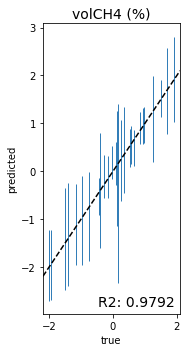

In [25]:
y_pred_mu_CH4 = predict_CH4(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_CH4 = predict_CH4(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_CH4_scaled = scale_output(y_pred_mu_CH4, y_pred_std_CH4, y_scaler_11=y_scaler_11, n=2)[0]
y_pred_std_CH4_scaled = scale_output(y_pred_mu_CH4, y_pred_std_CH4, y_scaler_11=y_scaler_11, n=2)[1]

plot_calculated_output(y_scaled_11, y_pred_mu_CH4_scaled, y_pred_std_CH4_scaled, 2)

In [53]:
def predict_CH4_covar(X=FEATURES_GASIF_12, y=TARGETS_GASIF_11, 
                      model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_CO = predict_coregionalized(model, X_scaled, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
    y_pred_std_CO = predict_coregionalized(model, X_scaled, 0)[1]*sqrt(y_scaler_11.var_[1])
    y_pred_mu_H2 = predict_coregionalized(model, X_scaled, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
    y_pred_std_H2 = predict_coregionalized(model, X_scaled, 1)[1]*sqrt(y_scaler_11.var_[3])
    y_pred_mu_COMB = predict_coregionalized(model, X_scaled, 2)[0]*sqrt(y_scaler_11.var_[4]) + y_scaler_11.mean_[4]
    y_pred_std_COMB = predict_coregionalized(model, X_scaled, 2)[1]*sqrt(y_scaler_11.var_[4])
    
    y_pred_mu_CH4 = y_pred_mu_COMB - y_pred_mu_CO - y_pred_mu_H2
    
    cov1 = np.corrcoef(y['volCOMB (%)'], y['volCO (%)'])[0,1]*y_pred_std_COMB.flatten()*y_pred_std_CO.flatten()
    cov2 = np.corrcoef(y['volCOMB (%)'], y['volH2 (%)'])[0,1]*y_pred_std_COMB.flatten()*y_pred_std_H2.flatten()
    cov3 = np.corrcoef(y['volCO (%)'], y['volH2 (%)'])[0,1]*y_pred_std_CO.flatten()*y_pred_std_H2.flatten()
    y_pred_std_CH4_covar = sqrt(np.sum(np.square([y_pred_std_COMB, y_pred_std_CO, y_pred_std_H2]),
                                       axis=0).flatten() - 2*cov1 - 2*cov2 - 2*cov3)

    return y_pred_mu_CH4, y_pred_std_CH4_covar

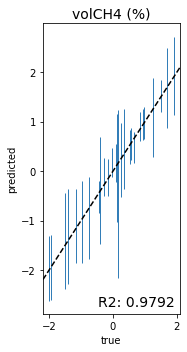

In [27]:
y_pred_mu_CH4 = predict_CH4_covar(X, y, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_CH4_covar = predict_CH4_covar(X, y, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_CH4_scaled = scale_output(y_pred_mu_CH4, y_pred_std_CH4_covar, y_scaler_11=y_scaler_11, n=2)[0]
y_pred_std_CH4_scaled_covar = scale_output(y_pred_mu_CH4, y_pred_std_CH4_covar, y_scaler_11=y_scaler_11, n=2)[1]

plot_calculated_output(y_scaled_11, y_pred_mu_CH4_scaled, y_pred_std_CH4_scaled_covar, 2)

In [55]:
cov1 = np.corrcoef(TARGETS_GASIF_11['volCOMB (%)'], TARGETS_GASIF_11[
    'volCO (%)'])[0,1]*y_pred_std_COMB.flatten()*y_pred_std_CO.flatten()

cov2 = np.corrcoef(TARGETS_GASIF_11['volCOMB (%)'], TARGETS_GASIF_11[
    'volH2 (%)'])[0,1]*y_pred_std_COMB.flatten()*y_pred_std_H2.flatten()

cov3 = np.corrcoef(TARGETS_GASIF_11['volCO (%)'], TARGETS_GASIF_11[
    'volH2 (%)'])[0,1]*y_pred_std_CO.flatten()*y_pred_std_H2.flatten()

In [59]:
y_pred_std_CH4_covar = sqrt(np.sum(np.square([y_pred_std_COMB, y_pred_std_CO, y_pred_std_H2]), 
                                 axis=0).flatten() - 2*cov1 - 2*cov2 - 2*cov3)
y_pred_std_CH4_scaled_covar = (y_pred_std_CH4_covar/sqrt(y_scaler_11.var_[2])).flatten()

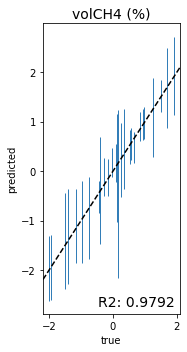

In [60]:
plot_calculated_output(y_scaled_11, y_pred_mu_CH4_scaled, y_pred_std_CH4_scaled_covar, 2)

In [28]:
y_pred_std_CH4.flatten()

array([1.4680624 , 1.646588  , 1.26921128, 1.00722625, 1.15706653,
       1.21764356, 0.62465747, 1.23797079, 0.52437427, 0.51624895,
       1.46766204, 1.6459429 , 1.27187182, 1.00796047, 1.15600082,
       1.21842038, 0.62765674, 1.23777981, 0.52741093, 0.51879586,
       0.53448592, 0.51242667, 0.46705209, 0.52499154, 0.60181473,
       0.53738447, 0.51527718, 0.48337602, 0.55241426, 2.57043138])

In [29]:
y_pred_std_CH4_covar

array([1.32413592, 1.49042972, 1.14009596, 0.89357631, 1.03392706,
       1.09127119, 0.53290383, 1.11028245, 0.44230078, 0.43610656,
       1.32390441, 1.48994637, 1.14267214, 0.89438503, 1.03314012,
       1.0920927 , 0.53573933, 1.1101511 , 0.44499911, 0.43845679,
       0.45044793, 0.43334235, 0.39237367, 0.44085522, 0.51141653,
       0.45309117, 0.43597331, 0.40663936, 0.46513651, 2.34278126])

#### calculation of volSYNG predictions

In [30]:
TARGETS_GASIF_11.columns[5]

'volSYNG (%)'

In [32]:
def predict_SYNG(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_CO = predict_coregionalized(model, X_scaled, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
    y_pred_std_CO = predict_coregionalized(model, X_scaled, 0)[1]*sqrt(y_scaler_11.var_[1])
    y_pred_mu_H2 = predict_coregionalized(model, X_scaled, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
    y_pred_std_H2 = predict_coregionalized(model, X_scaled, 1)[1]*sqrt(y_scaler_11.var_[3])
    
    y_pred_mu_SYNG = y_pred_mu_CO + y_pred_mu_H2
    y_pred_std_SYNG = additive_errorprop([y_pred_std_CO, y_pred_std_H2])

    return y_pred_mu_SYNG, y_pred_std_SYNG

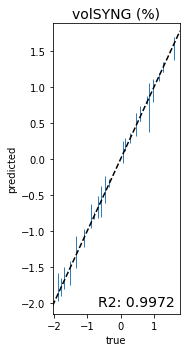

In [33]:
y_pred_mu_SYNG = predict_SYNG(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_SYNG = predict_SYNG(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_SYNG_scaled = scale_output(y_pred_mu_SYNG, y_pred_std_SYNG, y_scaler_11=y_scaler_11, n=5)[0]
y_pred_std_SYNG_scaled = scale_output(y_pred_mu_SYNG, y_pred_std_SYNG, y_scaler_11=y_scaler_11, n=5)[1]

plot_calculated_output(y_scaled_11, y_pred_mu_SYNG_scaled, y_pred_std_SYNG_scaled, 5)

In [34]:
def predict_SYNG_covar(X=FEATURES_GASIF_12, y=TARGETS_GASIF_11, 
                       model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_CO = predict_coregionalized(model, X_scaled, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
    y_pred_std_CO = predict_coregionalized(model, X_scaled, 0)[1]*sqrt(y_scaler_11.var_[1])
    y_pred_mu_H2 = predict_coregionalized(model, X_scaled, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
    y_pred_std_H2 = predict_coregionalized(model, X_scaled, 1)[1]*sqrt(y_scaler_11.var_[3])

    y_pred_mu_SYNG = y_pred_mu_CO + y_pred_mu_H2
    
    cov1 = np.corrcoef(y['volCO (%)'], y['volH2 (%)'])[0,1]*y_pred_std_CO.flatten()*y_pred_std_H2.flatten()
    y_pred_std_SYNG_covar = sqrt(np.sum(np.square([y_pred_std_CO, y_pred_std_H2]), axis=0).flatten() + 2*cov1)

    return y_pred_mu_SYNG, y_pred_std_SYNG_covar

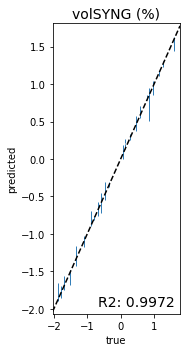

In [35]:
y_pred_mu_SYNG = predict_SYNG_covar(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_SYNG_covar = predict_SYNG_covar(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_SYNG_scaled = scale_output(y_pred_mu_SYNG, y_pred_std_SYNG_covar, y_scaler_11=y_scaler_11, n=5)[0]
y_pred_std_SYNG_scaled_covar = scale_output(y_pred_mu_SYNG, y_pred_std_SYNG_covar, y_scaler_11=y_scaler_11, n=5)[1]

plot_calculated_output(y_scaled_11, y_pred_mu_SYNG_scaled, y_pred_std_SYNG_scaled_covar, 5)

In [36]:
y_pred_std_SYNG.flatten()

array([1.06848465, 1.20757065, 0.91536611, 0.70483949, 0.82435443,
       0.87356771, 0.37916135, 0.88962197, 0.29231167, 0.29222964,
       1.06842142, 1.2072697 , 0.91762419, 0.70567517, 0.82391064,
       0.87435786, 0.38207337, 0.8895585 , 0.29497737, 0.29491023,
       0.29507505, 0.29290197, 0.24518559, 0.27256836, 0.3567821 ,
       0.29821482, 0.29580653, 0.26033143, 0.30147344, 1.91198654])

In [37]:
y_pred_std_SYNG_covar

array([0.64029131, 0.72363883, 0.54853476, 0.42237632, 0.49399585,
       0.523487  , 0.22721315, 0.53310754, 0.17516837, 0.17511918,
       0.64025342, 0.72345849, 0.54988791, 0.42287711, 0.49372991,
       0.5239605 , 0.22895819, 0.53306951, 0.1767658 , 0.17672553,
       0.17682432, 0.17552209, 0.14692795, 0.16333718, 0.21380235,
       0.17870583, 0.17726265, 0.15600412, 0.18065858, 1.14576128])

#### calculation of H2/CO predictions

In [38]:
TARGETS_GASIF_11.columns[6]

'H2_CO'

In [71]:
def predict_H2CO(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_CO = predict_coregionalized(model, X_scaled, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
    y_pred_std_CO = predict_coregionalized(model, X_scaled, 0)[1]*sqrt(y_scaler_11.var_[1])
    y_pred_mu_H2 = predict_coregionalized(model, X_scaled, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
    y_pred_std_H2 = predict_coregionalized(model, X_scaled, 1)[1]*sqrt(y_scaler_11.var_[3])
    
    y_pred_mu_H2CO = y_pred_mu_H2 / y_pred_mu_CO
    y_pred_std_H2CO = additive_errorprop([y_pred_std_H2/y_pred_mu_H2, y_pred_std_CO/y_pred_mu_CO])*y_pred_mu_H2CO

    return y_pred_mu_H2CO, y_pred_std_H2CO

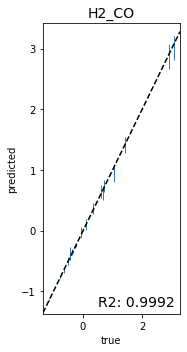

In [39]:
y_pred_mu_H2CO = predict_H2CO(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_H2CO = predict_H2CO(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_H2CO_scaled = scale_output(y_pred_mu_H2CO, y_pred_std_H2CO, y_scaler_11=y_scaler_11, n=6)[0]
y_pred_std_H2CO_scaled = scale_output(y_pred_mu_H2CO, y_pred_std_H2CO, y_scaler_11=y_scaler_11, n=6)[1]

plot_calculated_output(y_scaled_11, y_pred_mu_H2CO_scaled, y_pred_std_H2CO_scaled, 6)

#### calculation of HHV predictions

In [73]:
TARGETS_GASIF_11.columns[7]

'HHV (MJ/m3)'

In [74]:
def predict_HHV(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_CO = predict_coregionalized(model, X_scaled, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
    y_pred_std_CO = predict_coregionalized(model, X_scaled, 0)[1]*sqrt(y_scaler_11.var_[1])
    y_pred_mu_H2 = predict_coregionalized(model, X_scaled, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
    y_pred_std_H2 = predict_coregionalized(model, X_scaled, 1)[1]*sqrt(y_scaler_11.var_[3])
    y_pred_mu_COMB = predict_coregionalized(model, X_scaled, 2)[0]*sqrt(y_scaler_11.var_[4]) + y_scaler_11.mean_[4]
    y_pred_std_COMB = predict_coregionalized(model, X_scaled, 2)[1]*sqrt(y_scaler_11.var_[4])
    y_pred_mu_CH4 = y_pred_mu_COMB - y_pred_mu_CO - y_pred_mu_H2
    y_pred_std_CH4 = additive_errorprop([y_pred_std_COMB, y_pred_std_CO, y_pred_std_H2])
    
    y_pred_mu_HHV = (11.76*y_pred_mu_CO + 11.882*y_pred_mu_H2 + 37.024*y_pred_mu_CH4)/100
    y_pred_std_HHV = additive_errorprop([11.76/100*y_pred_std_CO, 11.882/100*y_pred_std_H2, 37.024/100*y_pred_std_CH4])

    return y_pred_mu_HHV, y_pred_std_HHV

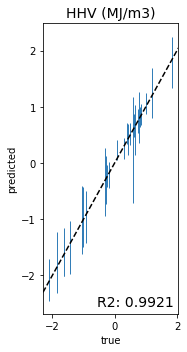

In [40]:
y_pred_mu_HHV = predict_HHV(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_HHV = predict_HHV(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_HHV_scaled = scale_output(y_pred_mu_HHV, y_pred_std_HHV, y_scaler_11=y_scaler_11, n=7)[0]
y_pred_std_HHV_scaled = scale_output(y_pred_mu_HHV, y_pred_std_HHV, y_scaler_11=y_scaler_11, n=7)[1]

plot_calculated_output(y_scaled_11, y_pred_mu_HHV_scaled, y_pred_std_HHV_scaled, 7)

#### calculation of GAS predictions

In [76]:
TARGETS_GASIF_11.columns[10]

'GAS (m3/kg biom)'

In [77]:
def predict_GAS(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_CO = predict_coregionalized(model, X_scaled, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
    y_pred_std_CO = predict_coregionalized(model, X_scaled, 0)[1]*sqrt(y_scaler_11.var_[1])
    y_pred_mu_H2 = predict_coregionalized(model, X_scaled, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
    y_pred_std_H2 = predict_coregionalized(model, X_scaled, 1)[1]*sqrt(y_scaler_11.var_[3])
    y_pred_mu_COMB = predict_coregionalized(model, X_scaled, 2)[0]*sqrt(y_scaler_11.var_[4]) + y_scaler_11.mean_[4]
    y_pred_std_COMB = predict_coregionalized(model, X_scaled, 2)[1]*sqrt(y_scaler_11.var_[4])
    y_pred_mu_Edens = predict_coregionalized(model, X_scaled, 3)[0]*sqrt(y_scaler_11.var_[9]) + y_scaler_11.mean_[9]
    y_pred_std_Edens = predict_coregionalized(model, X_scaled, 3)[1]*sqrt(y_scaler_11.var_[9])
    y_pred_mu_CH4 = y_pred_mu_COMB - y_pred_mu_CO - y_pred_mu_H2
    y_pred_std_CH4 = additive_errorprop([y_pred_std_COMB, y_pred_std_CO, y_pred_std_H2])
    y_pred_mu_HHV = (11.76*y_pred_mu_CO + 11.882*y_pred_mu_H2 + 37.024*y_pred_mu_CH4)/100
    y_pred_std_HHV = additive_errorprop([11.76/100*y_pred_std_CO, 11.882/100*y_pred_std_H2, 37.024/100*y_pred_std_CH4])
    
    y_pred_mu_GAS = y_pred_mu_Edens / y_pred_mu_HHV
    y_pred_std_GAS = additive_errorprop([y_pred_std_Edens/y_pred_mu_Edens,
                                         y_pred_std_HHV/y_pred_mu_HHV])*y_pred_mu_GAS
    
    return y_pred_mu_GAS, y_pred_std_GAS

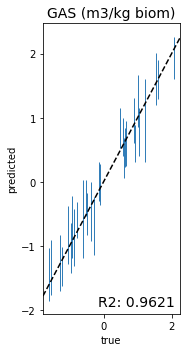

In [41]:
y_pred_mu_GAS = predict_GAS(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[0]
y_pred_std_GAS = predict_GAS(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11)[1]

y_pred_mu_GAS_scaled = scale_output(y_pred_mu_GAS, y_pred_std_GAS, y_scaler_11=y_scaler_11, n=10)[0]
y_pred_std_GAS_scaled = scale_output(y_pred_mu_GAS, y_pred_std_GAS, y_scaler_11=y_scaler_11, n=10)[1]

plot_calculated_output(y_scaled_11, y_pred_mu_GAS_scaled, y_pred_std_GAS_scaled, 10)

#### calculation of CGE predictions

In [79]:
TARGETS_GASIF_11.columns[8]

'CGE (%)'

In [80]:
def predict_CGE(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11, 
                HHVbiom=FEATURES_GASIF_12['HHVbiom (MJ/kg)']):
    X_scaled = x_scaler.transform(X)
    y_pred_mu_CO = predict_coregionalized(model, X_scaled, 0)[0]*sqrt(y_scaler_11.var_[1]) + y_scaler_11.mean_[1]
    y_pred_std_CO = predict_coregionalized(model, X_scaled, 0)[1]*sqrt(y_scaler_11.var_[1])
    y_pred_mu_H2 = predict_coregionalized(model, X_scaled, 1)[0]*sqrt(y_scaler_11.var_[3]) + y_scaler_11.mean_[3]
    y_pred_std_H2 = predict_coregionalized(model, X_scaled, 1)[1]*sqrt(y_scaler_11.var_[3])
    y_pred_mu_COMB = predict_coregionalized(model, X_scaled, 2)[0]*sqrt(y_scaler_11.var_[4]) + y_scaler_11.mean_[4]
    y_pred_std_COMB = predict_coregionalized(model, X_scaled, 2)[1]*sqrt(y_scaler_11.var_[4])
    y_pred_mu_Edens = predict_coregionalized(model, X_scaled, 3)[0]*sqrt(y_scaler_11.var_[9]) + y_scaler_11.mean_[9]
    y_pred_std_Edens = predict_coregionalized(model, X_scaled, 3)[1]*sqrt(y_scaler_11.var_[9])
    y_pred_mu_CH4 = y_pred_mu_COMB - y_pred_mu_CO - y_pred_mu_H2
    y_pred_std_CH4 = additive_errorprop([y_pred_std_COMB, y_pred_std_CO, y_pred_std_H2])
    y_pred_mu_HHV = (11.76*y_pred_mu_CO + 11.882*y_pred_mu_H2 + 37.024*y_pred_mu_CH4)/100
    y_pred_std_HHV = additive_errorprop([11.76/100*y_pred_std_CO, 11.882/100*y_pred_std_H2, 37.024/100*y_pred_std_CH4])
    y_pred_mu_GAS = y_pred_mu_Edens / y_pred_mu_HHV
    y_pred_std_GAS = additive_errorprop([y_pred_std_Edens/y_pred_mu_Edens,
                                         y_pred_std_HHV/y_pred_mu_HHV])*y_pred_mu_GAS
    
    y_pred_mu_CGE = y_pred_mu_GAS * y_pred_mu_HHV / np.reshape(HHVbiom.values, (-1,1))*100
    y_pred_std_CGE = additive_errorprop([y_pred_std_GAS/y_pred_mu_GAS, 
                                         y_pred_std_HHV/y_pred_mu_HHV]) * y_pred_mu_GAS * y_pred_mu_HHV / np.reshape(
        HHVbiom.values, (-1,1))*100
    
    return y_pred_mu_CGE, y_pred_std_CGE

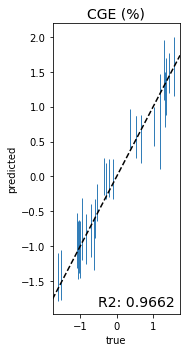

In [42]:
y_pred_mu_CGE = predict_CGE(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11,
                            HHVbiom=FEATURES_GASIF_12['HHVbiom (MJ/kg)'])[0]
y_pred_std_CGE = predict_CGE(X, model=model, x_scaler=x_scaler_12, y_scaler_11=y_scaler_11,
                             HHVbiom=FEATURES_GASIF_12['HHVbiom (MJ/kg)'])[1]

y_pred_mu_CGE_scaled = scale_output(y_pred_mu_CGE, y_pred_std_CGE, y_scaler_11=y_scaler_11, n=8)[0]
y_pred_std_CGE_scaled = scale_output(y_pred_mu_CGE, y_pred_std_CGE, y_scaler_11=y_scaler_11, n=8)[1]

plot_calculated_output(y_scaled_11, y_pred_mu_CGE_scaled, y_pred_std_CGE_scaled, 8)